# Ridge Regression Assignment 1

In this assignment, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:

Use a pre-built implementation of regression to run polynomial regression

Use matplotlib to visualize polynomial regressions

Use a pre-built implementation of regression to run polynomial regression, this time with L2 penalty

Use matplotlib to visualize polynomial regressions under L2 regularization

Choose best L2 penalty using cross-validation.

Assess the final fit using test data.

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import random
import math
%matplotlib inline

## The Data

In [178]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
house_df=pd.read_csv("kc_house_data.csv",dtype=dtype_dict)
train_df=pd.read_csv("wk3_kc_house_train_data.csv",dtype=dtype_dict)
validation_df=pd.read_csv("wk3_kc_house_valid_data.csv",dtype=dtype_dict)
test_df=pd.read_csv("wk3_kc_house_test_data.csv",dtype=dtype_dict)
set_1=pd.read_csv("wk3_kc_house_set_1_data.csv",dtype=dtype_dict)
set_2=pd.read_csv("wk3_kc_house_set_2_data.csv",dtype=dtype_dict)
set_3=pd.read_csv("wk3_kc_house_set_3_data.csv",dtype=dtype_dict)
set_4=pd.read_csv("wk3_kc_house_set_4_data.csv",dtype=dtype_dict)
train_valid_shuffled=pd.read_csv("wk3_kc_house_train_valid_shuffled.csv",dtype=dtype_dict)

In [179]:
#Define a function that takes an array feature and a maximal degree, then returns a data frame with the original feature as
#the first column, then each subsequent column is the data of the first raised to increasing integer powers, up to the
#maximal degree
def polynomial_df(series,maxdegree):
    poly_df=pd.DataFrame({"x":series})
    for degree in range(2,maxdegree+1):
        poly_df["x^"+str(degree)]=series**degree
    return poly_df

In [180]:
sales = house_df.copy()
sales = sales.sort_values(['sqft_living','price'])

In [181]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


## Task 1
Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using 'polynomial_df' and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5

Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (l2_penalty=1.5e-5) to make the solution numerically stable. (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

Also, we will use the parameter normalize=True so that the X values range between 0 and 1 (since they currently do not)

In [182]:
X_poly15=polynomial_df(sales.sqft_living,15)

In [183]:
ridge_regressor=Ridge(alpha=1.5e-5,normalize=True).fit(X_poly15,sales.price)

In [184]:
coef_df=pd.DataFrame({"Feature":X_poly15.columns,"Coefficient":ridge_regressor.coef_})
coef_df

,Coefficient,Feature
0,1.248733e+02,x
1,-4.773760e-02,x^2
2,3.014462e-05,x^3
3,-2.444199e-09,x^4
4,-1.941537e-13,x^5
5,8.540857e-18,x^6
6,1.511421e-21,x^7
7,8.279791e-26,x^8
8,6.526031e-31,x^9
9,-3.278950e-34,x^10


## Task 2

Observe Overfitting

Recall from Module 3 (Polynomial Regression) that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Module 3.

Just as we did in Module 3 (Polynomial Regression), fit a 15th degree polynomial on each of the 4 sets, plot the results and view the weights for the four models. This time, set alpha to 1e-9 (a very small penalty).

In [185]:
set_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000.0,1.0,0.75,430.0,5050,1,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200.0,7500.0
1,1352300580,20141114T000000,247000.0,1.0,1.00,460.0,4120,1,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990.0,4120.0
2,1320069249,20141020T000000,192500.0,1.0,1.00,470.0,63737,1,0,2,...,5,470,0,1924,0,98022,47.2163,-121.984,1350.0,46762.0
3,1437500015,20140709T000000,150000.0,3.0,0.75,490.0,38500,1.5,0,0,...,5,490,0,1959,0,98014,47.7112,-121.315,800.0,18297.0
4,0859000110,20141002T000000,125000.0,1.0,1.00,500.0,7440,1,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350.0,7440.0


In [186]:
poly_set_list=[]
for dataset in [set_1,set_2,set_3,set_4]:
    poly_temp=polynomial_df(dataset.sqft_living,15)
    poly_temp["price"]=dataset.price
    poly_set_list.append(poly_temp)

model_list1=[]
for polyset in poly_set_list:
    model=Ridge(alpha=1e-9,normalize=True).fit(polyset[polyset.columns[polyset.columns!="price"]],polyset.price)
    model_list1.append(model)

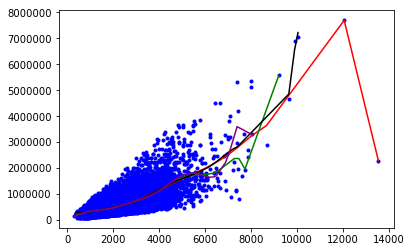

In [187]:
#Graph
plt.figure()
plt.plot(sales.sqft_living,sales.price,".",color="blue")
plt.plot(set_1.sqft_living,
         model_list1[0].predict(poly_set_list[0][poly_set_list[0].columns[poly_set_list[0].columns!="price"]]),
        color="red")
plt.plot(set_2.sqft_living,
         model_list1[1].predict(poly_set_list[1][poly_set_list[1].columns[poly_set_list[1].columns!="price"]]),
        color="green")
plt.plot(set_3.sqft_living,
         model_list1[2].predict(poly_set_list[2][poly_set_list[2].columns[poly_set_list[2].columns!="price"]]),
        color="black")
plt.plot(set_4.sqft_living,
         model_list1[3].predict(poly_set_list[3][poly_set_list[3].columns[poly_set_list[3].columns!="price"]]),
        color="purple")

In [188]:
coef2_df=pd.DataFrame({"Set 1 coef":model_list1[0].coef_,"Set 2 coef":model_list1[1].coef_,
                      "Set 3 coef":model_list1[2].coef_,"Set 4 coef":model_list1[3].coef_},index=X_poly15.columns)

In [189]:
coef2_df

,Set 1 coef,Set 2 coef,Set 3 coef,Set 4 coef
x,5.446694e+02,8.593627e+02,-7.553960e+02,1.119446e+03
x^2,-3.554476e-01,-8.181183e-01,9.755795e-01,-9.837601e-01
x^3,1.224464e-04,4.288800e-04,-4.589460e-04,3.387708e-04
x^4,-1.171753e-08,-9.127708e-08,7.779582e-08,3.603775e-08
x^5,-3.905125e-13,-2.696041e-12,7.150131e-12,-4.378141e-11
x^6,-1.390764e-17,3.739803e-15,-2.886020e-15,5.771917e-15
x^7,1.478603e-20,-1.427119e-19,-2.136781e-20,7.667954e-19
x^8,6.874914e-25,-6.307947e-23,3.380852e-23,-9.492979e-23
x^9,-7.572039e-29,-1.445596e-27,2.191782e-27,-1.960308e-26
x^10,-1.040973e-32,7.443212e-31,-1.970678e-31,-2.108793e-32


Quiz Question: For the models learned in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?

In [190]:
coef2_df.loc["x"].sort_values()

Set 3 coef    -755.395959
Set 1 coef     544.669398
Set 2 coef     859.362655
Set 4 coef    1119.445662
Name: x, dtype: float64

## Task 3

Ridge regression comes to rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights. (The weights looked quite small, but they are not that small because 'sqft_living' input is in the order of thousands.)

Fit a 15th-order polynomial model on set_1, set_2, set_3, and set_4, this time with a large L2 penalty (1.23e2)

In [191]:
model_list2=[]
for polyset in poly_set_list:
    model=Ridge(alpha=1.23e2,normalize=True).fit(polyset[polyset.columns[polyset.columns!="price"]],polyset.price)
    model_list2.append(model)

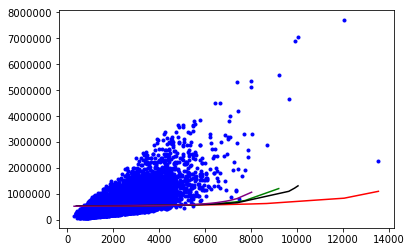

In [192]:
#Graph
plt.figure()
plt.plot(sales.sqft_living,sales.price,".",color="blue")
plt.plot(set_1.sqft_living,
         model_list2[0].predict(poly_set_list[0][poly_set_list[0].columns[poly_set_list[0].columns!="price"]]),
        color="red")
plt.plot(set_2.sqft_living,
         model_list2[1].predict(poly_set_list[1][poly_set_list[1].columns[poly_set_list[1].columns!="price"]]),
        color="green")
plt.plot(set_3.sqft_living,
         model_list2[2].predict(poly_set_list[2][poly_set_list[2].columns[poly_set_list[2].columns!="price"]]),
        color="black")
plt.plot(set_4.sqft_living,
         model_list2[3].predict(poly_set_list[3][poly_set_list[3].columns[poly_set_list[3].columns!="price"]]),
        color="purple")

In [193]:
coef3_df=pd.DataFrame({"Set 1 coef":model_list2[0].coef_,"Set 2 coef":model_list2[1].coef_,
                      "Set 3 coef":model_list2[2].coef_,"Set 4 coef":model_list2[3].coef_},index=X_poly15.columns)
coef3_df.loc["x"].sort_values()

Set 4 coef    2.085962
Set 2 coef    2.097569
Set 3 coef    2.289063
Set 1 coef    2.328068
Name: x, dtype: float64

## Task 4
### Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data.

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. We reserve 10% of the data as the test set and randomly shuffle the remainder. Le'ts call the shuffled data 'train_valid_shuffled'.

For the purpose of this assignment and consistency, we will use the shuffled data in the file
wk3_kc_house_train_valid_shuffled.csv

In practice, you would shuffle the rows with a dynamically determined random seed. For a pandas dataframe, df, we would use the method df.sample(frac=1) to shuffle the rows (the frac parameter determines the fraction of rows to shuffle).

Divide the combined training and validation set into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

In [194]:
n=len(train_valid_shuffled)
k=10
n//k

1939

In [195]:
#Let each fold be 1940 elements long, and the last fold have what is remaining.
step=1940
start_stop_tuples=[]
for i in range(k-1):
    start_stop_tuples.append((i*1940,(i+1)*1940))
start_stop_tuples.append(((k-1)*1940,n))

In [196]:
start_stop_tuples

[(0, 1940),
 (1940, 3880),
 (3880, 5820),
 (5820, 7760),
 (7760, 9700),
 (9700, 11640),
 (11640, 13580),
 (13580, 15520),
 (15520, 17460),
 (17460, 19396)]

In [197]:
#Create a list of all the k fold train sets and validation sets. The list should be comprised of tuples, where the first 
#element of the tuple is the train set and the second element is the validation set

kfold_train_valid_sets=[]
for tup in start_stop_tuples:
    validation=train_valid_shuffled[tup[0]:tup[1]]
    train=pd.concat([train_valid_shuffled[:tup[0]],train_valid_shuffled[tup[1]:]])
    kfold_train_valid_sets.append((train,validation))

Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe containing input features (e.g. poly15_data) and (iv) column of output values (e.g. price). The function returns the average validation error using k segments as validation sets. We shall assume that the input dataframe does not contain the output column.

In [198]:
#Residual summ of squares function
def rss(ytrue,ypredict):
    return ((ytrue-ypredict)**2).sum()

In [219]:
#Inputs are k, alpha, data frame consisting of a column of x values and a column of y values (others may be included),
#name of the x column, name of the y column
def kfold_valid_error(k,alpha,df,ycolumn):
    n=len(df)
    step=n//k
    
    #Create a list of all the k fold train sets and validation sets. The list should be comprised of tuples, where the first 
    #element of the tuple is the train set and the second element is the validation set
    
    start_stop_tuples=[]
    for i in range(k-1):
        start_stop_tuples.append((i*step,(i+1)*step))
    start_stop_tuples.append(((k-1)*step,n))
    
    #Create a list of all the k fold train sets and validation sets. The list should be comprised of tuples, where the first 
    #element of the tuple is the train set and the second element is the validation set

    kfold_train_valid_sets=[]
    for tup in start_stop_tuples:
        validation=df[tup[0]:tup[1]]
        train=pd.concat([df[:tup[0]],df[tup[1]:]])
        kfold_train_valid_sets.append((train,validation))
        
    validation_errors=[]
    x_column_list=list(df.columns[df.columns!=ycolumn])
    for fold in kfold_train_valid_sets: 
        X_train=fold[0][x_column_list]
        y_train=fold[0][ycolumn]
        X_valid=fold[1][x_column_list]
        y_valid=fold[1][ycolumn]
        model=Ridge(alpha,normalize=True).fit(X_train,y_train)
        RSS=rss(y_valid,model.predict(X_valid))
        validation_errors.append(RSS)
    return np.mean(validation_errors)

In [220]:
df_k_poly15=polynomial_df(train_valid_shuffled.sqft_living,15)
df_k_poly15["price"]=train_valid_shuffled.price

In [221]:
kfold_valid_error(10,1,df_k_poly15,"price")

131792123199160.22

For each alpha in [10^3, 10^3.5, 10^4, 10^4.5, ..., 10^9], compute the error with k=10 fold cross validation. 

In [226]:
the_error_list=[]
for a in np.logspace(3, 9, num=13):
    error=kfold_valid_error(10,a,df_k_poly15,"price")
    the_error_list.append(error)

In [227]:
error_list

[264977267565083.34,
 265692934832402.59,
 265924396419120.56,
 265998117900716.56,
 266021483761035.84,
 266028878015365.19,
 266031216816339.0,
 266031956463403.06,
 266032190365667.81,
 266032264332591.06,
 266032287723039.41,
 266032295119753.69,
 266032297458800.94]

Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty?

In [231]:
X_opt_train=polynomial_df(train_df.sqft_living,15)
y_opt_train=train_df.price
X_opt_test=polynomial_df(test_df.sqft_living,15)
y_opt_test=test_df.price

In [230]:
ridge_optimum=Ridge(1000,normalize=True).fit(X_opt_train,y_opt_train)

In [232]:
rss(y_opt_test,ridge_optimum.predict(X_opt_test))

283756877067954.9